In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print("Number of null values in each column:\n")
df.isnull().any()

Number of null values in each column:



Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
print("Number of zero values in each column:\n")
for columns in df.columns:
    col = df[columns]
    count = (col == 0).sum()
    print(columns, count)

Number of zero values in each column:

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [6]:
Glucose_col = df['Glucose']
Glucose_col.replace(to_replace = 0, value = Glucose_col.mean(), inplace=True)

In [7]:
BP_col = df['BloodPressure']
BP_col.replace(to_replace = 0, value = BP_col.mean(), inplace=True)

In [8]:
BMI_col = df['BMI']
BMI_col.replace(to_replace = 0, value = BMI_col.mean(), inplace=True)

In [9]:
index = df[(df['Insulin'] == 0) | (df['SkinThickness'] == 0) ].index
df.drop(index, inplace=True)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.611407,70.654822,29.106599,155.548223,33.069778,0.525543,30.814721,0.329949
std,3.209635,30.783159,12.469919,10.504273,118.775855,7.015215,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
print("Number of zero values in each column after cleaning:\n")
for columns in df.columns:
    col = df[columns]
    count = (col == 0).sum()
    print(columns + ":", count)

Number of zero values in each column after cleaning:

Pregnancies: 57
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 264


<AxesSubplot:>

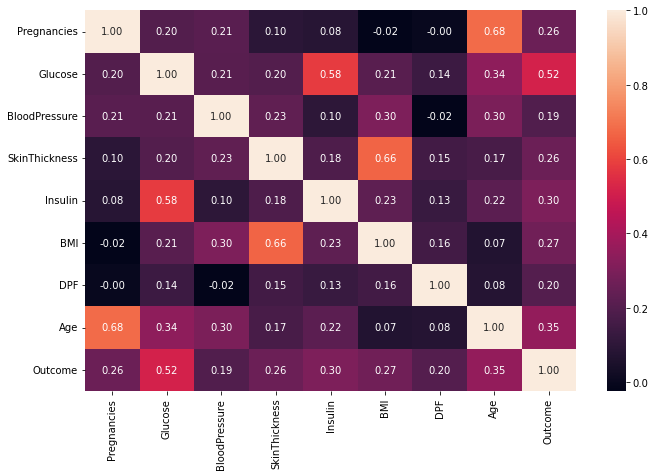

In [12]:
df = df.rename(columns={'DiabetesPedigreeFunction': 'DPF'})
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".2f")

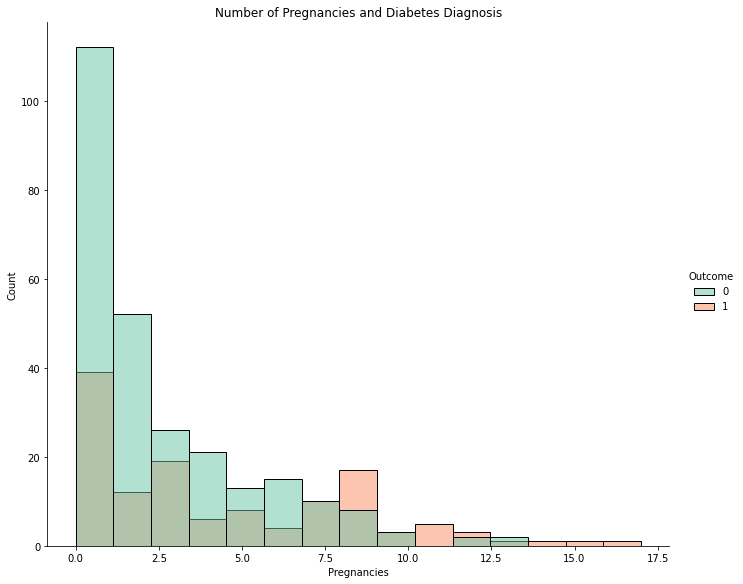

In [13]:
sns.displot(x='Pregnancies',data=df, bins=15, height=8, aspect=1.2, hue='Outcome',palette='Set2')
plt.title("Number of Pregnancies and Diabetes Diagnosis")
plt.show()

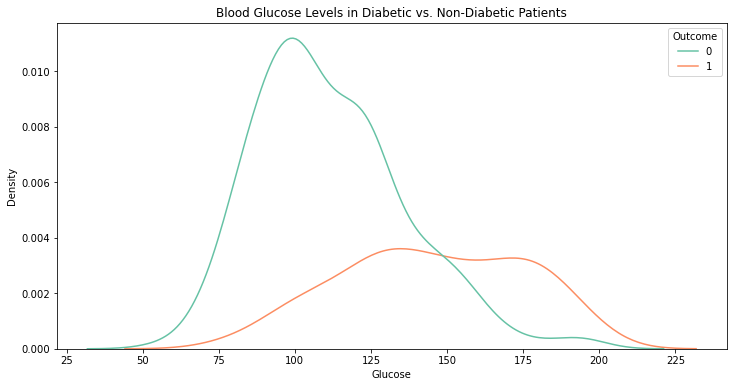

In [14]:
plt.figure(figsize=(12,6))
sns.kdeplot(x='Glucose', data=df, hue='Outcome', palette='Set2')
plt.title("Blood Glucose Levels in Diabetic vs. Non-Diabetic Patients")
plt.show()

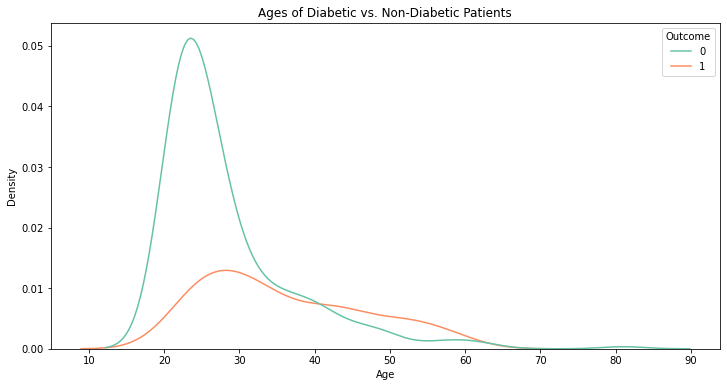

In [15]:
plt.figure(figsize=(12,6))
sns.kdeplot(x='Age',data=df,hue='Outcome',palette='Set2')
plt.title("Ages of Diabetic vs. Non-Diabetic Patients")
plt.show()

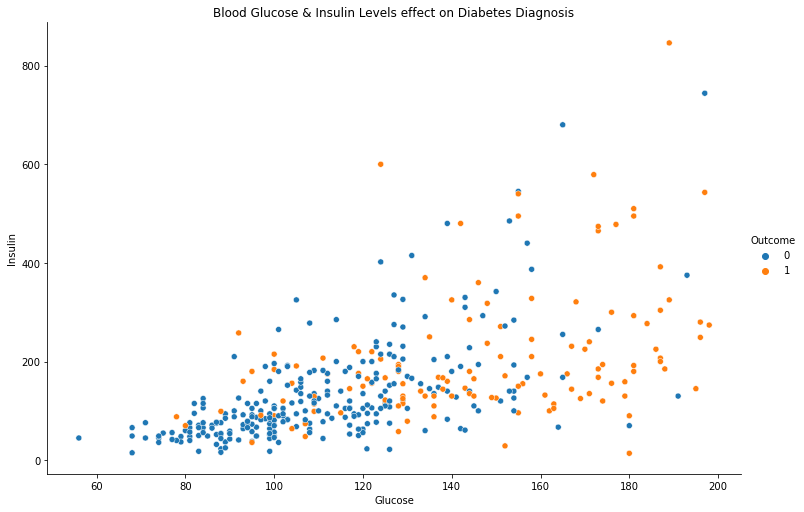

In [16]:
sns.relplot(x='Glucose', y='Insulin', data=df, hue='Outcome', height=7,aspect=1.5)
plt.title("Blood Glucose & Insulin Levels effect on Diabetes Diagnosis")
plt.show()

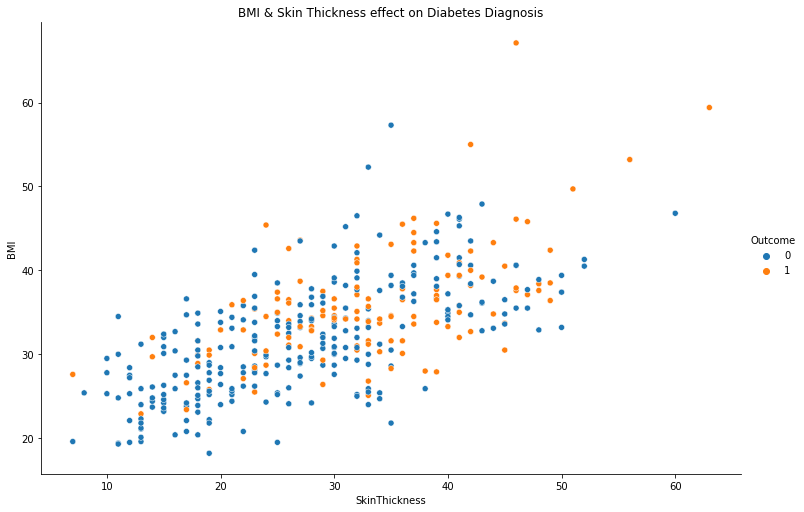

In [17]:
sns.relplot(x='SkinThickness', y='BMI', data=df, hue='Outcome', height=7,aspect=1.5)
plt.title("BMI & Skin Thickness effect on Diabetes Diagnosis")
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
scaler = StandardScaler()

In [19]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI', 'DPF', 'Age']
X = df[features]
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = features
y = df['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=6)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)
score = logreg.score(X_test,y_test)
print(f'Accuracy: {score * 100}%')

Accuracy: 82.27848101265823%


Text(0.5, 15.0, 'Predicted label')

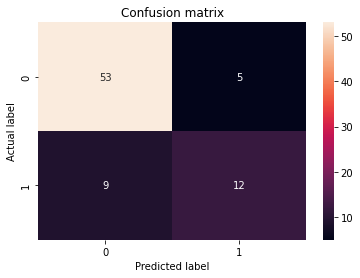

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
labels = ['No Diabetes','Diabetes']
print(metrics.classification_report(y_test,prediction, target_names=labels))

              precision    recall  f1-score   support

 No Diabetes       0.85      0.91      0.88        58
    Diabetes       0.71      0.57      0.63        21

    accuracy                           0.82        79
   macro avg       0.78      0.74      0.76        79
weighted avg       0.82      0.82      0.82        79



In [39]:
kfold = KFold(n_splits=10)
model = LogisticRegression()
scores = cross_val_score(logreg, X_scaled, y, cv=kfold)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.8        0.875      0.65       0.575      0.84615385 0.82051282
 0.84615385 0.82051282 0.74358974 0.87179487]
Mean: 0.7848717948717949
Standard deviation: 0.09481555852320367


In [37]:
# Diabetes predciton 
# 'Pregnancies' ,'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI', 'DPF', 'Age'
# Example with patient who should have diabetes(Output of 1)
# High BMI
# Older
# High blood glucose levels
data=[5,121,72,23,112,26.2,2,60]
patient=pd.DataFrame([data],columns=features)
patient_scaled = scaler.transform(patient)
diabetes_prediction=logreg.predict(patient_scaled)
print(diabetes_prediction)

[1]


In [25]:
# Example with patient who should not have diabetes (Output of 0)
# Average BMI
# Younger
# Low blood glucose levels
data=[5,80,72,23,112,15,2,28]
patient=pd.DataFrame([data],columns=features)
patient_scaled = scaler.transform(patient)
diabetes_prediction=logreg.predict(patient_scaled)
print(diabetes_prediction)

[0]


In [26]:
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,-0.713386,-1.093265,-0.373759,-0.582083,-0.518847,-0.709329,-1.025340,-0.963548
1,-1.025344,0.468012,-2.461427,0.561761,0.104968,1.431599,5.040165,0.214537
2,-0.089470,-1.451057,-1.658478,0.275800,-0.569426,-0.295416,-0.793701,-0.472679
3,-0.401428,2.419608,-0.052579,1.514965,3.266189,-0.366781,-1.051077,2.178012
4,-0.713386,2.159395,-0.855528,-0.582083,5.820456,-0.423872,-0.364740,2.767055
...,...,...,...,...,...,...,...,...
389,-1.025344,1.899182,1.392730,1.419645,2.988002,1.460145,-0.868054,-0.472679
390,-0.713386,0.175273,1.392730,0.943043,-0.383968,0.489591,1.519828,0.607232
391,-0.401428,-1.125791,-1.016118,-0.296122,-1.176381,-0.666511,0.687644,-0.865374
392,2.094236,-0.702946,0.429191,1.800926,0.206127,-0.024232,-1.013901,3.159750
